In [1]:
# The Iris dataset - Setosa, Virgínica e versicolor - Sepal e Petals - length and width
# The species problem in Iris (1936)

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [3]:
iris_dataset = sns.load_dataset('iris')

In [4]:
iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [6]:
iris_dataset.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
setosa = iris_dataset.loc[iris_dataset['species'] == 'setosa']

versicolor = iris_dataset.loc[iris_dataset['species'] == 'versicolor']

virginica = iris_dataset.loc[iris_dataset['species'] == 'virginica']


In [8]:
train_setosa, test_setosa = train_test_split(setosa, test_size=10, random_state=42)

train_versicolor, test_versicolor = train_test_split(versicolor, test_size=10, random_state=42)

train_virginica, test_virginica = train_test_split(virginica, test_size=10, random_state=42)


In [9]:
data = pd.concat([train_setosa, train_versicolor, train_virginica])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 12 to 138
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.6+ KB


In [10]:
#Analisando os dados

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,5.849167,0.826148,4.4,5.100,5.8,6.4,7.9
sepal_width,120.0,3.066667,0.431401,2.0,2.800,3.0,3.3,4.4
petal_length,120.0,3.775000,1.773202,1.0,1.575,4.4,5.1,6.9
petal_width,120.0,1.210833,0.765297,0.1,0.300,1.3,1.8,2.5


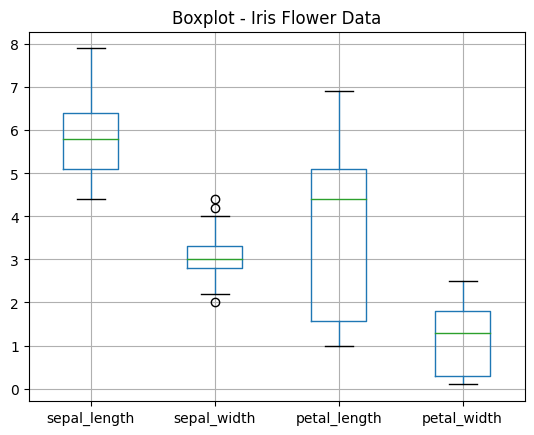

In [11]:
data.boxplot()
plt.title('Boxplot - Iris Flower Data')

plt.show()

array([[<AxesSubplot: title={'center': 'sepal_length'}>,
        <AxesSubplot: title={'center': 'sepal_width'}>],
       [<AxesSubplot: title={'center': 'petal_length'}>,
        <AxesSubplot: title={'center': 'petal_width'}>]], dtype=object)

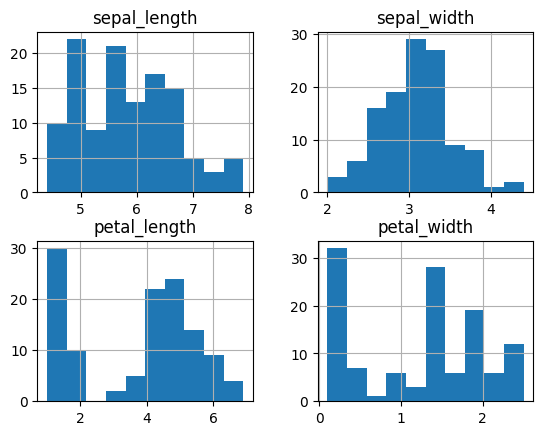

In [12]:
data.hist()

Com 95.0% de confiança, TENHO evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.02776050940155983


/tmp/ipykernel_13764/1302004499.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column_names[i]], fit=stats.norm, kde=False, label=aux)


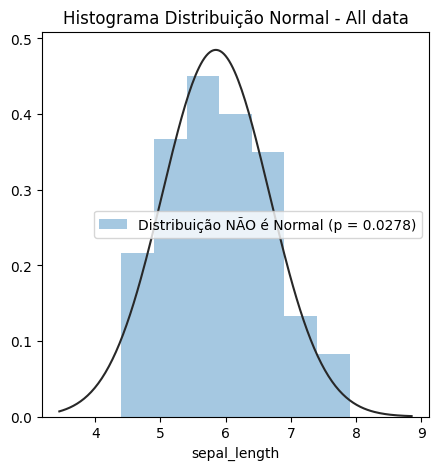

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.2607835829257965


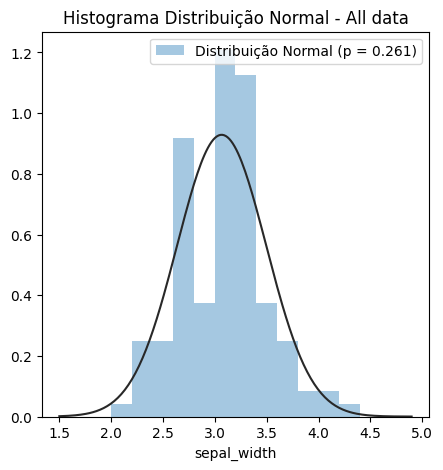

Com 95.0% de confiança, TENHO evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  9.226255315297749e-09


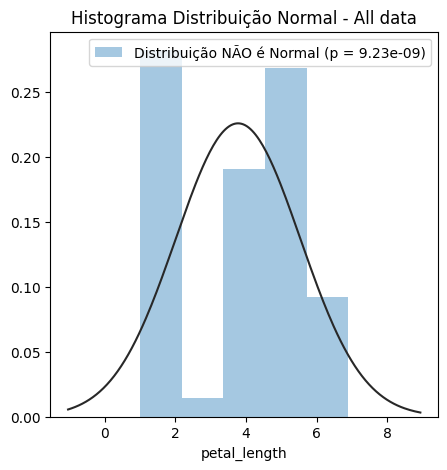

Com 95.0% de confiança, TENHO evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  1.645879734724076e-07


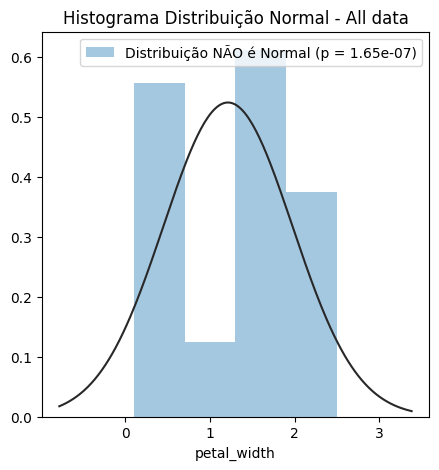

In [13]:
# Loop para iterar sobre todas as características da Iris Flower
column_names = data.columns
for i in range(len(column_names)-1):

    # Aplicação do Teste Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(data[column_names[i]])
    alpha = 0.05

    if shapiro_p > alpha:
        aux = 'Distribuição Normal ' + '(p = {:.3})'.format(shapiro_p)
        print('Com ' + str(100-100*alpha) + '% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados'+
        ' de acordo com o teste de Shapiro-Wilk p - value = ',shapiro_p)
    else:
        aux = 'Distribuição NÃO é Normal ' + '(p = {:.3})'.format(shapiro_p)
        print('Com ' + str(100-100*alpha) + '% de confiança, TENHO evidências para rejeitar a Normalidade dos dados'+
        ' de acordo com o teste de Shapiro-Wilk p - value = ',shapiro_p)

    plt.figure(figsize=(5,5))

    sns.distplot(data[column_names[i]], fit=stats.norm, kde=False, label=aux)
    plt.legend()
    plt.title('Histograma Distribuição Normal - All data')
    plt.show()

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.2831823229789734


/tmp/ipykernel_13764/1078742450.py:33: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_aux[column_names[i]], fit=stats.norm, kde=False, label=aux)


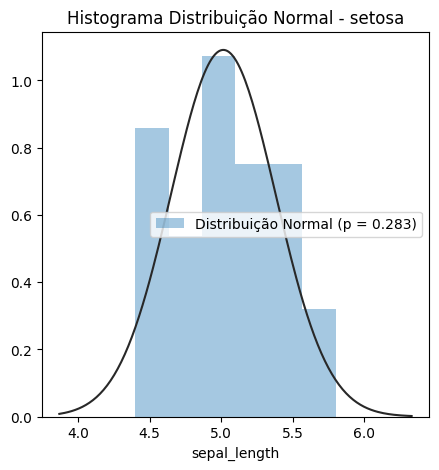

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.36090049147605896


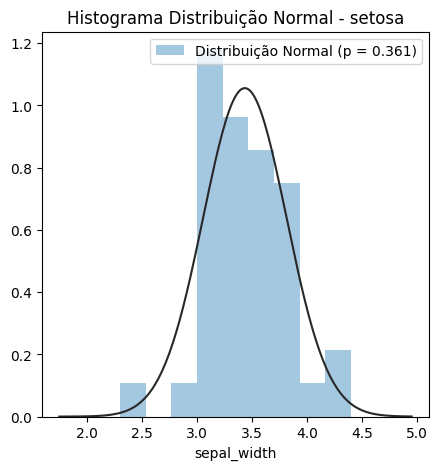

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.06448562443256378


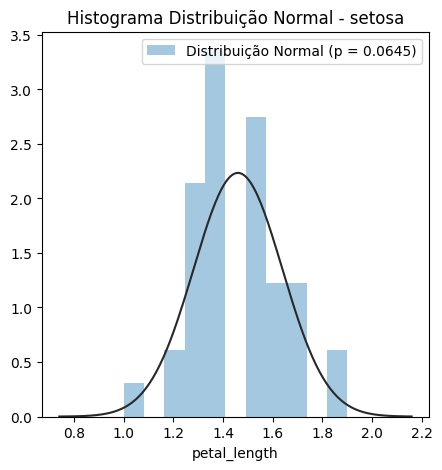

Com 95.0% de confiança, TENHO evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  1.097143240258447e-06


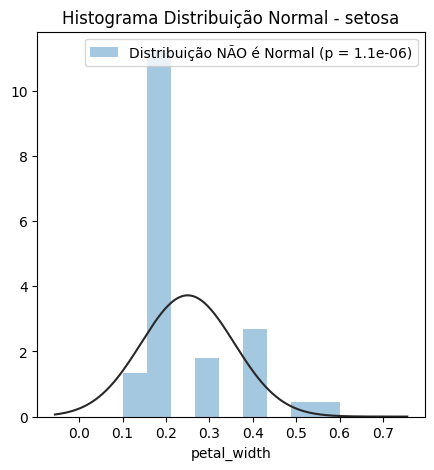

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.7610535025596619


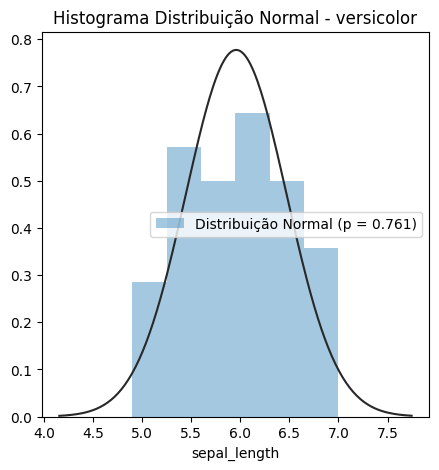

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.19125917553901672


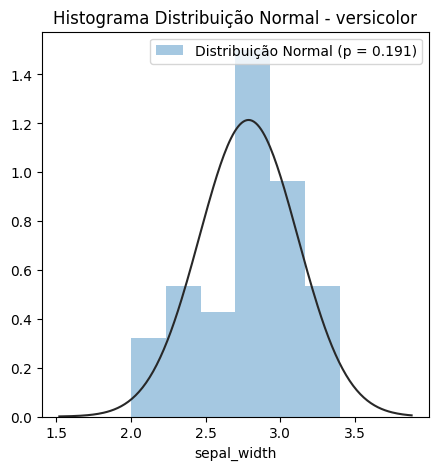

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.09351281821727753


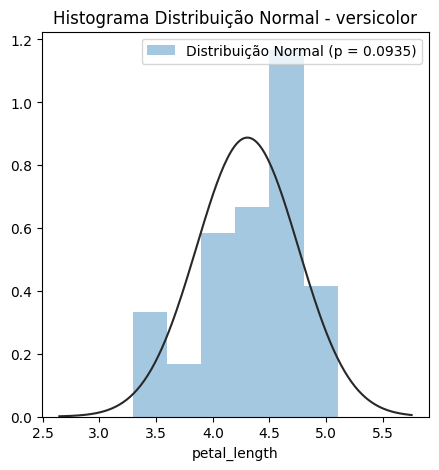

Com 95.0% de confiança, TENHO evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.015254694037139416


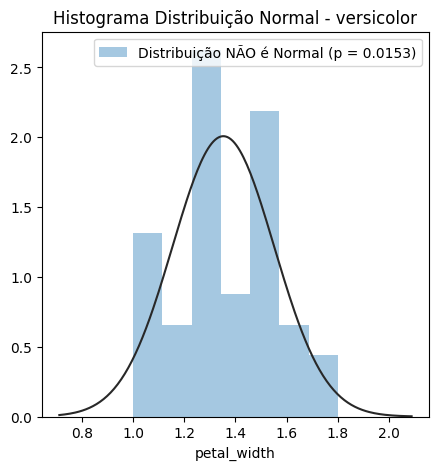

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.29415351152420044


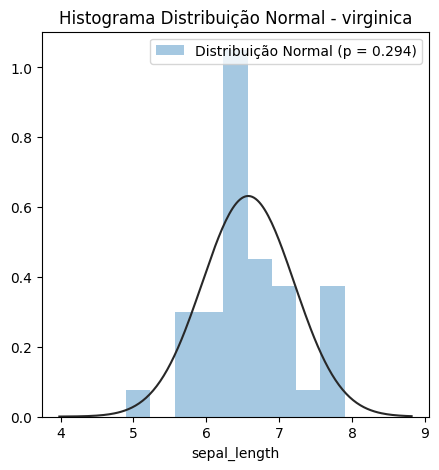

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.1356232613325119


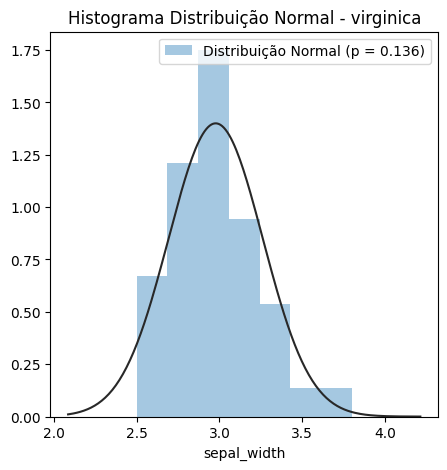

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.258571058511734


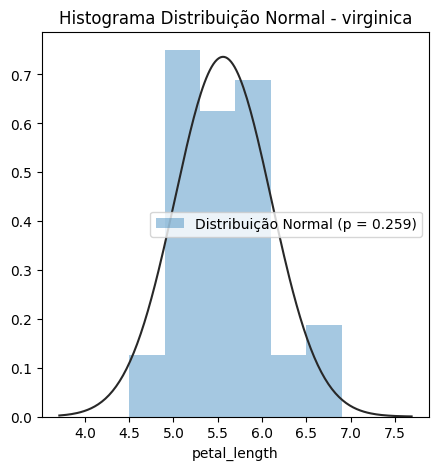

Com 95.0% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados de acordo com o teste de Shapiro-Wilk p - value =  0.12357261776924133


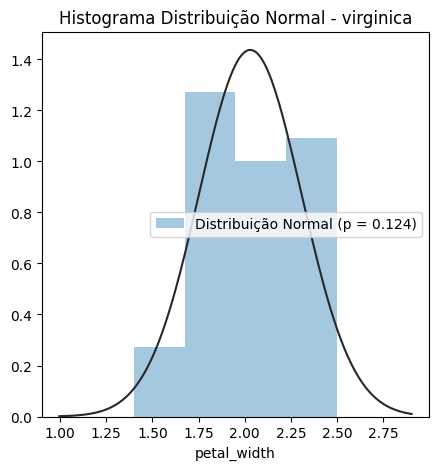

In [14]:
# Checking the data distribution for each variety of the Iris Flower


column_names = data.columns
iris_variety = data.species.unique()

# Loop to iterate over all the Iris 'Species'

for j in range(len(iris_variety)):

    
    data_aux = data.loc[data['species'] == iris_variety[j]]

    # Loop to iterate over all the 'Characteristcs' of the Iris Flower
    for i in range(len(column_names)-1):

        

        # Aplicação do Teste Shapiro-Wilk
        shapiro_stat, shapiro_p = stats.shapiro(data_aux[column_names[i]])
        alpha = 0.05

        if shapiro_p > alpha:
            aux = 'Distribuição Normal ' + '(p = {:.3})'.format(shapiro_p)
            print('Com ' + str(100-100*alpha) + '% de confiança, NÃO tenho evidências para rejeitar a Normalidade dos dados'+
            ' de acordo com o teste de Shapiro-Wilk p - value = ',shapiro_p)
        else:
            aux = 'Distribuição NÃO é Normal ' + '(p = {:.3})'.format(shapiro_p)
            print('Com ' + str(100-100*alpha) + '% de confiança, TENHO evidências para rejeitar a Normalidade dos dados'+
            ' de acordo com o teste de Shapiro-Wilk p - value = ',shapiro_p)

        plt.figure(figsize=(5,5))
        sns.distplot(data_aux[column_names[i]], fit=stats.norm, kde=False, label=aux)
        plt.legend()
        plt.title('Histograma Distribuição Normal - '+iris_variety[j])
        plt.show()

In [15]:
# Basic stats for each variety

In [16]:
for j in range(len(iris_variety)):
    print('-'*65)
    print(iris_variety[j])
    print(data.loc[data['species'] == iris_variety[j]].describe().transpose())
print('-'*65)

-----------------------------------------------------------------
setosa
              count   mean       std  min    25%  50%    75%  max
sepal_length   40.0  5.015  0.370412  4.4  4.775  5.0  5.250  5.8
sepal_width    40.0  3.435  0.382669  2.3  3.200  3.4  3.625  4.4
petal_length   40.0  1.460  0.180881  1.0  1.375  1.4  1.525  1.9
petal_width    40.0  0.250  0.108604  0.1  0.200  0.2  0.300  0.6
-----------------------------------------------------------------
versicolor
              count    mean       std  min  25%   50%  75%  max
sepal_length   40.0  5.9575  0.519806  4.9  5.6  6.00  6.3  7.0
sepal_width    40.0  2.7875  0.332965  2.0  2.6  2.85  3.0  3.4
petal_length   40.0  4.3050  0.455142  3.3  4.0  4.40  4.6  5.1
petal_width    40.0  1.3525  0.201262  1.0  1.3  1.30  1.5  1.8
-----------------------------------------------------------------
virginica
              count    mean       std  min  25%  50%    75%  max
sepal_length   40.0  6.5750  0.639611  4.9  6.3  6.5  6.900

In [17]:
# Individuals boxplots for the Iris Flower varieties

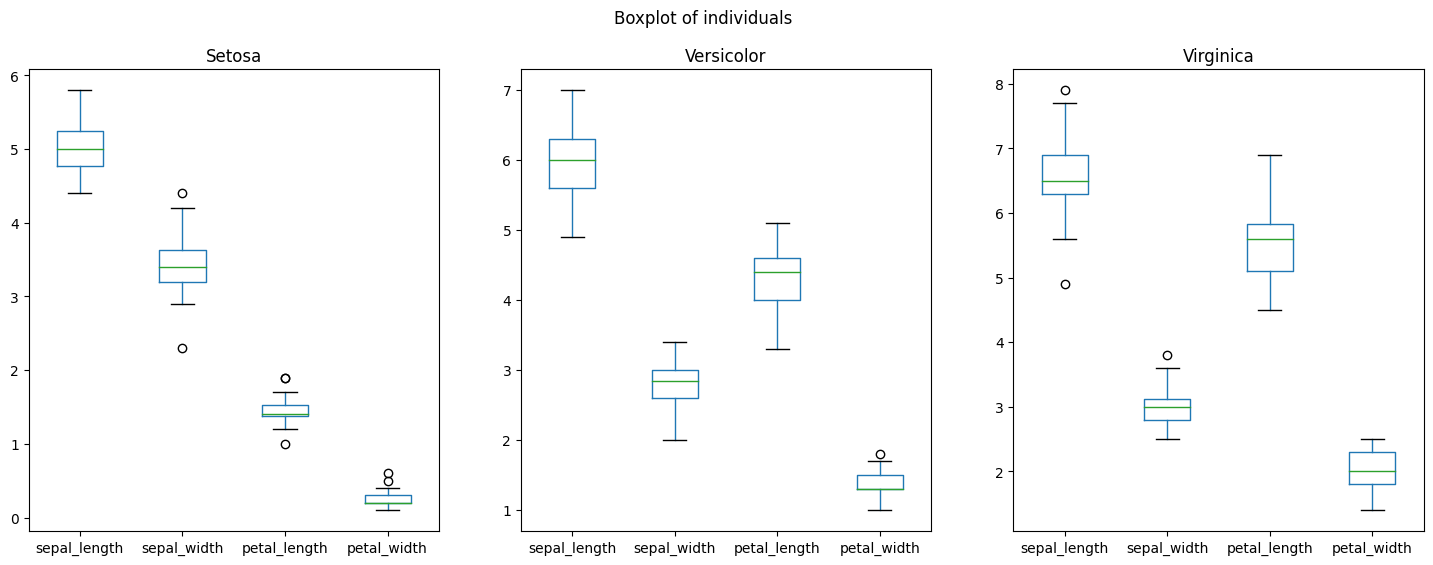

In [18]:
fig, ax = plt.subplots(1,3, figsize=(18,6))
data.loc[data['species']=='setosa'].boxplot(ax=ax[0], grid=False)
ax[0].set_title('Setosa')
data.loc[data['species']=='versicolor'].boxplot(ax=ax[1], grid=False)
ax[1].set_title('Versicolor')
data.loc[data['species']=='virginica'].boxplot(ax=ax[2], grid=False)
ax[2].set_title('Virginica')

plt.suptitle('Boxplot of individuals')
plt.show()

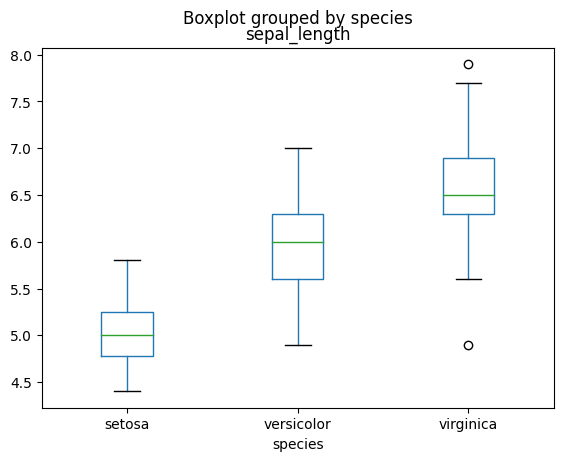

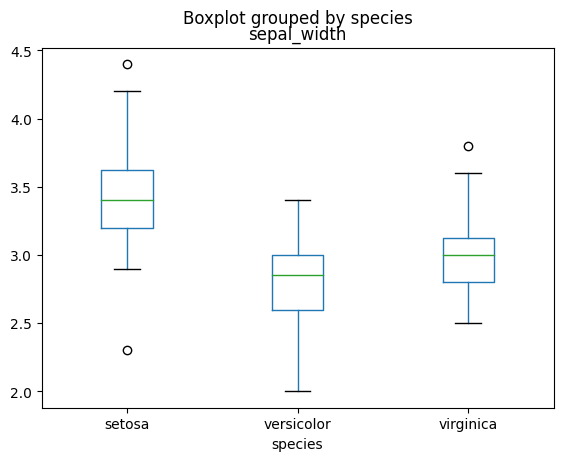

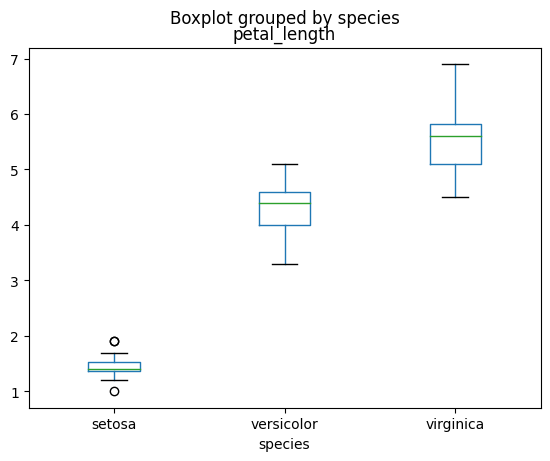

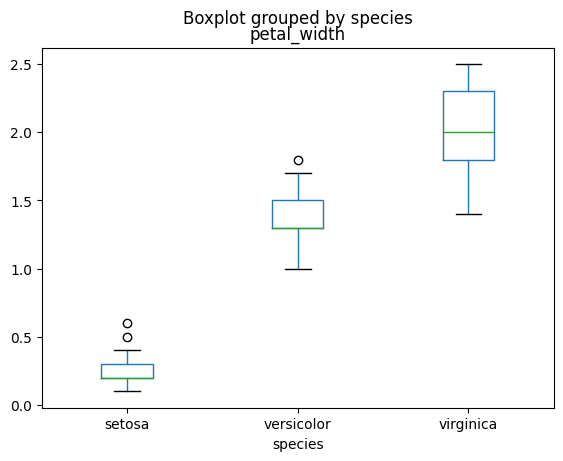

In [19]:
for k in range(len(column_names)-1):

    data.boxplot(column=[column_names[k]], by = 'species', grid=False)
    plt.show()

In [ ]:
# Looking for patterns - Scatter plots

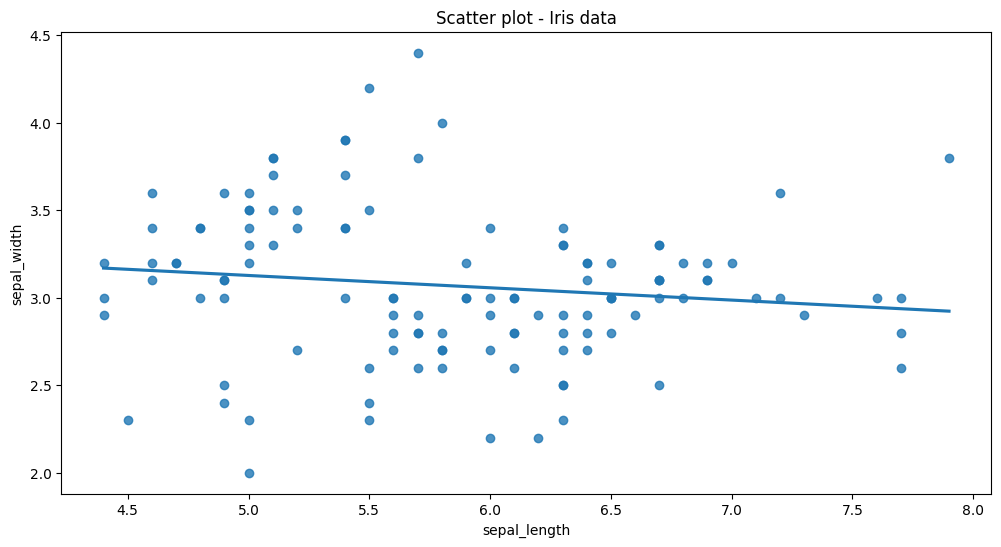

R Pearson = -0.135
P - value = 0.142
There is NO linear relationship between sepal_length and sepal_width
With 95.0% of confidential level, the line is parallel to the x axis


In [46]:
# Selecting the axis

x_axis = 'sepal_length'
y_axis = 'sepal_width'


# Scatter plot

plt.figure(figsize=(12,6))
sns.regplot(x = data[x_axis],y = data[y_axis], ci=None)


# adding labels
plt.title('Scatter plot - Iris data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

reg_linear = stats.linregress(data[x_axis], data[y_axis])
#Slope(Coeficiente Angular da Reta)
#Intercept(Coeficiente linear da Reta)
#rvalue(r de Pearson)
#pvalue(valor de p do ajuste)(verifica se a reta obtida é paralela ao eixo x, se sim, a mudança em x não afeta os valores em y)
#stderr(variância do modelo)

# O coeficiente de Pearson é uma medida que varia entre 1 e -1, na qual indica o quão forte é a relação entre x e y

print('R Pearson = ' + '{:.3}'.format(reg_linear[2]))
print('P - value = '+ '{:.3}'.format(reg_linear[3]))

if reg_linear[3] < alpha:
    print('There is a linear relationship between ' +  x_axis + ' and ' + y_axis)
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is NOT parallel to the x axis')
else: 
    print('There is NO linear relationship between ' +  x_axis + ' and ' + y_axis) # o comprimento não está relacionado com a largura
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is parallel to the x axis')



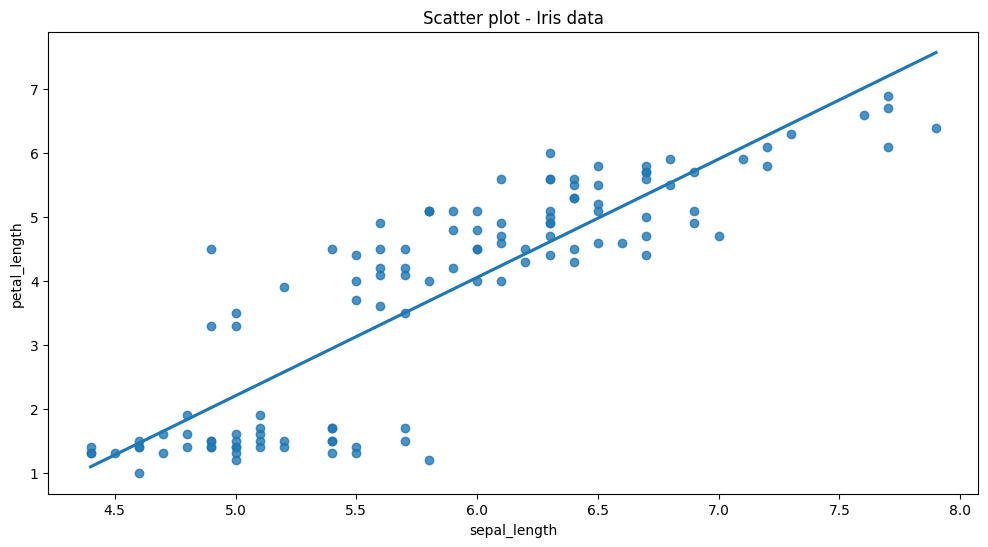

R Pearson = 0.863
P - value = 8.97e-37
There is a linear relationship between sepal_length and petal_length
With 95.0% of confidential level, the line is NOT parallel to the x axis


In [47]:
# Selecting the axis

x_axis = 'sepal_length'
y_axis = 'petal_length'


# Scatter plot

plt.figure(figsize=(12,6))
sns.regplot(x = data[x_axis],y = data[y_axis], ci=None)


# adding labels
plt.title('Scatter plot - Iris data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

reg_linear = stats.linregress(data[x_axis], data[y_axis])
#Slope(Coeficiente Angular da Reta)
#Intercept(Coeficiente linear da Reta)
#rvalue(r de Pearson)
#pvalue(valor de p do ajuste)(verifica se a reta obtida é paralela ao eixo x, se sim, a mudança em x não afeta os valores em y)
#stderr(variância do modelo)

# O coeficiente de Pearson é uma medida que varia entre 1 e -1, na qual indica o quão forte é a relação entre x e y

print('R Pearson = ' + '{:.3}'.format(reg_linear[2]))
print('P - value = '+ '{:.3}'.format(reg_linear[3]))

if reg_linear[3] < alpha:
    print('There is a linear relationship between ' +  x_axis + ' and ' + y_axis)
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is NOT parallel to the x axis')
else: 
    print('There is NO linear relationship between ' +  x_axis + ' and ' + y_axis) # o comprimento não está relacionado com a largura
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is parallel to the x axis')



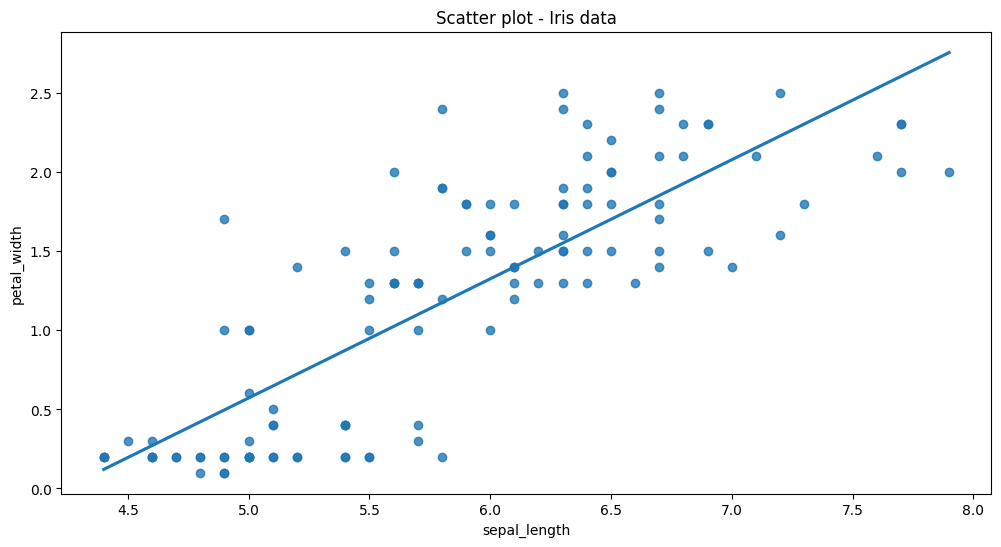

R Pearson = 0.813
P - value = 1.95e-29
There is a linear relationship between sepal_length and petal_width
With 95.0% of confidential level, the line is NOT parallel to the x axis


In [48]:
# Selecting the axis

x_axis = 'sepal_length'
y_axis = 'petal_width'


# Scatter plot

plt.figure(figsize=(12,6))
sns.regplot(x = data[x_axis],y = data[y_axis], ci=None)


# adding labels
plt.title('Scatter plot - Iris data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

reg_linear = stats.linregress(data[x_axis], data[y_axis])
#Slope(Coeficiente Angular da Reta)
#Intercept(Coeficiente linear da Reta)
#rvalue(r de Pearson)
#pvalue(valor de p do ajuste)(verifica se a reta obtida é paralela ao eixo x, se sim, a mudança em x não afeta os valores em y)
#stderr(variância do modelo)

# O coeficiente de Pearson é uma medida que varia entre 1 e -1, na qual indica o quão forte é a relação entre x e y

print('R Pearson = ' + '{:.3}'.format(reg_linear[2]))
print('P - value = '+ '{:.3}'.format(reg_linear[3]))

if reg_linear[3] < alpha:
    print('There is a linear relationship between ' +  x_axis + ' and ' + y_axis)
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is NOT parallel to the x axis')
else: 
    print('There is NO linear relationship between ' +  x_axis + ' and ' + y_axis) # o comprimento não está relacionado com a largura
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is parallel to the x axis')



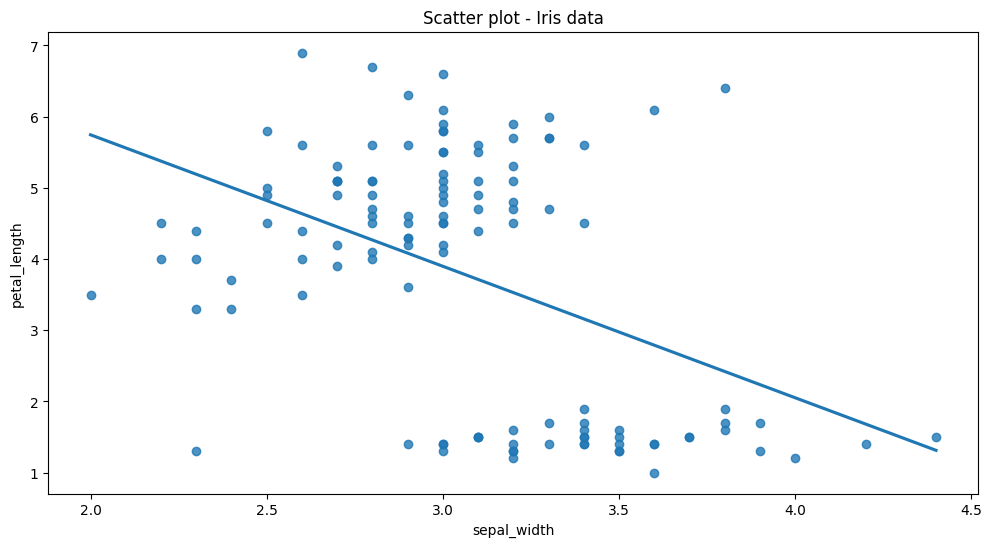

R Pearson = -0.449
P - value = 2.64e-07
There is a linear relationship between sepal_width and petal_length
With 95.0% of confidential level, the line is NOT parallel to the x axis


In [49]:
# Selecting the axis

x_axis = 'sepal_width'
y_axis = 'petal_length'


# Scatter plot

plt.figure(figsize=(12,6))
sns.regplot(x = data[x_axis],y = data[y_axis], ci=None)


# adding labels
plt.title('Scatter plot - Iris data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

reg_linear = stats.linregress(data[x_axis], data[y_axis])
#Slope(Coeficiente Angular da Reta)
#Intercept(Coeficiente linear da Reta)
#rvalue(r de Pearson)
#pvalue(valor de p do ajuste)(verifica se a reta obtida é paralela ao eixo x, se sim, a mudança em x não afeta os valores em y)
#stderr(variância do modelo)

# O coeficiente de Pearson é uma medida que varia entre 1 e -1, na qual indica o quão forte é a relação entre x e y

print('R Pearson = ' + '{:.3}'.format(reg_linear[2]))
print('P - value = '+ '{:.3}'.format(reg_linear[3]))

if reg_linear[3] < alpha:
    print('There is a linear relationship between ' +  x_axis + ' and ' + y_axis)
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is NOT parallel to the x axis')
else: 
    print('There is NO linear relationship between ' +  x_axis + ' and ' + y_axis) # o comprimento não está relacionado com a largura
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is parallel to the x axis')



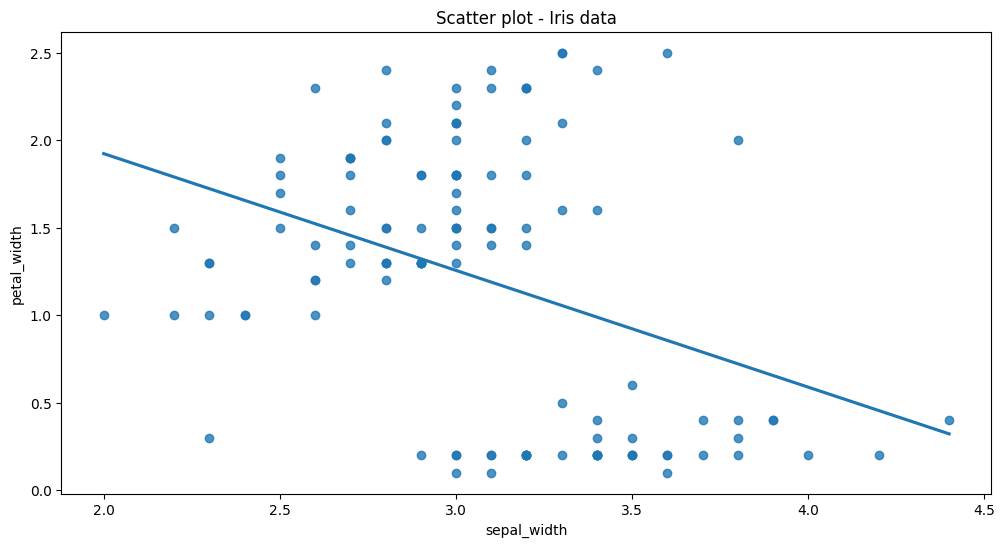

R Pearson = -0.376
P - value = 2.3e-05
There is a linear relationship between sepal_width and petal_width
With 95.0% of confidential level, the line is NOT parallel to the x axis


In [50]:
# Selecting the axis

x_axis = 'sepal_width'
y_axis = 'petal_width'


# Scatter plot

plt.figure(figsize=(12,6))
sns.regplot(x = data[x_axis],y = data[y_axis], ci=None)


# adding labels
plt.title('Scatter plot - Iris data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

reg_linear = stats.linregress(data[x_axis], data[y_axis])
#Slope(Coeficiente Angular da Reta)
#Intercept(Coeficiente linear da Reta)
#rvalue(r de Pearson)
#pvalue(valor de p do ajuste)(verifica se a reta obtida é paralela ao eixo x, se sim, a mudança em x não afeta os valores em y)
#stderr(variância do modelo)

# O coeficiente de Pearson é uma medida que varia entre 1 e -1, na qual indica o quão forte é a relação entre x e y

print('R Pearson = ' + '{:.3}'.format(reg_linear[2]))
print('P - value = '+ '{:.3}'.format(reg_linear[3]))

if reg_linear[3] < alpha:
    print('There is a linear relationship between ' +  x_axis + ' and ' + y_axis)
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is NOT parallel to the x axis')
else: 
    print('There is NO linear relationship between ' +  x_axis + ' and ' + y_axis) # o comprimento não está relacionado com a largura
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is parallel to the x axis')



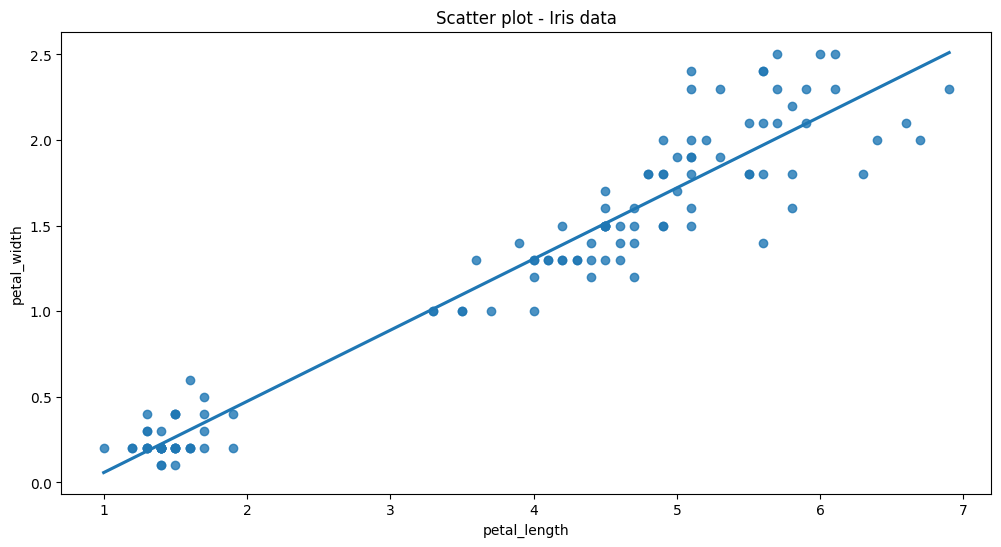

R Pearson = 0.964
P - value = 1.81e-69
There is a linear relationship between petal_length and petal_width
With 95.0% of confidential level, the line is NOT parallel to the x axis


In [51]:
# Selecting the axis

x_axis = 'petal_length'
y_axis = 'petal_width'


# Scatter plot

plt.figure(figsize=(12,6))
sns.regplot(x = data[x_axis],y = data[y_axis], ci=None)


# adding labels
plt.title('Scatter plot - Iris data')
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.show()

reg_linear = stats.linregress(data[x_axis], data[y_axis])
#Slope(Coeficiente Angular da Reta)
#Intercept(Coeficiente linear da Reta)
#rvalue(r de Pearson)
#pvalue(valor de p do ajuste)(verifica se a reta obtida é paralela ao eixo x, se sim, a mudança em x não afeta os valores em y)
#stderr(variância do modelo)

# O coeficiente de Pearson é uma medida que varia entre 1 e -1, na qual indica o quão forte é a relação entre x e y

print('R Pearson = ' + '{:.3}'.format(reg_linear[2]))
print('P - value = '+ '{:.3}'.format(reg_linear[3]))

if reg_linear[3] < alpha:
    print('There is a linear relationship between ' +  x_axis + ' and ' + y_axis)
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is NOT parallel to the x axis')
else: 
    print('There is NO linear relationship between ' +  x_axis + ' and ' + y_axis) # o comprimento não está relacionado com a largura
    print('With '+ str(100-100*alpha)+ '% of confidential level, the line is parallel to the x axis')



In [ ]:
# sepal length -> R Pearson = 0.863 -> petal length
# sepal length -> R Pearson = 0.813 -> petal width
#      / \                                 / \
#       |                                   |
# R Pearson = -0.135                R Pearson = 0.964
#       |                                   |
#      \ /                                 \ /
# sepal width -> R Pearson = -0.449 -> petal length
# sepal width -> R Pearson = -0.376 -> petal width

